<a href="https://colab.research.google.com/github/alearauj/DSA-Python-Fundamentos-Exercicios/blob/master/EBA_Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto Final do curso EBA - Estatística do Básico ao Avançado**

####Preparando as liberações

In [3]:
# Importando todas as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Liberando acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####Preparando o dataset

In [5]:
# Importando o primeiro csv
df1 = pd.read_csv("//content/drive/MyDrive/Cursos/Renata Biaggi - Estatística do básico ao avançado/Projeto Final - Teste de Hipótese/DEMO_PHQ.csv", encoding = "UTF-8")

In [6]:
# Importando o segundo csv
df2 = pd.read_csv("/content/drive/MyDrive/Cursos/Renata Biaggi - Estatística do básico ao avançado/Projeto Final - Teste de Hipótese/PAG_HEI.csv", encoding = "UTF-8")

In [7]:
# Unindo os arquivos
df = pd.merge(df1, df2, on='SEQN', how='left')

In [8]:
#Checando se o tamanho do arquivo gerado está coerente com o esperado.
df.shape

(5334, 31)

####Explorando os dataframes


In [9]:
# Conhecendo as colunas
df.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393


In [10]:
# Conhecendo o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4836 non-null   float64
 2   DPQ020                    4836 non-null   float64
 3   DPQ030                    4836 non-null   float64
 4   DPQ040                    4836 non-null   float64
 5   DPQ050                    4836 non-null   float64
 6   DPQ060                    4836 non-null   float64
 7   DPQ070                    4836 non-null   float64
 8   DPQ080                    4836 non-null   float64
 9   DPQ090                    4836 non-null   float64
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5334 non-null   int64  
 14  INDFMINC

**Ponto de atenção**: Nem todas as colunas estão com o formato adequado para a informação que o dado quer apresentar. Por exemplo,todas as colunas contendo **DPQ**, **INDFMINC**  e **ADHERENCE**  estão como FLOAT quando deveriam ser INT64 já que possuem valores representados por códigos numéricos de valor inteiro. Além disso, a coluna **SEQN** está como INT64, o que não está errado, mas como essa coluna é nosso código identificador e não queremos fazer nenhum cálculo com ela, vamos convertê-la para STR.

In [11]:
# Encontrando valores nulos

df.isna().sum()

SEQN                          0
DPQ010                      498
DPQ020                      498
DPQ030                      498
DPQ040                      498
DPQ050                      498
DPQ060                      498
DPQ070                      498
DPQ080                      498
DPQ090                      498
RIAGENDR                      0
RIDAGEYR                      0
RIDRETH1                      0
DMDEDUC                       0
INDFMINC                     47
PAG_MINW                      0
ADHERENCE                     0
HEI2015C1_TOTALVEG          274
HEI2015C2_GREEN_AND_BEAN    274
HEI2015C3_TOTALFRUIT        274
HEI2015C4_WHOLEFRUIT        274
HEI2015C5_WHOLEGRAIN        274
HEI2015C6_TOTALDAIRY        274
HEI2015C7_TOTPROT           274
HEI2015C8_SEAPLANT_PROT     274
HEI2015C9_FATTYACID         274
HEI2015C10_SODIUM           274
HEI2015C11_REFINEDGRAIN     274
HEI2015C12_SFAT             274
HEI2015C13_ADDSUG           274
HEI2015_TOTAL_SCORE         274
dtype: i

Precisamos entender o que os valores nulos significam em cada uma das colunas para definirmos o que faremos com eles.

*   As colunas **DPQ** indicam o sentimento do respondente nas duas últimas semanas. As linhas vazias indicam que o respondente não respondeu sobre como ele estava se sentindo. Temos 498 respondentes que não preencheram tais informações. Isso representa quase 10% do dataframe.
*   A coluna **INDFMINC** indica a renda anual familiar em USD. Temos 47 respondentes que não informaram sua renda.
*   As colunas **HEI2015C** informam o hábito alimentar de cada respondente. Temos 274 respondentes que não responderam sobre seus hábitos.

In [12]:
#somando os duplicados da base
df.duplicated().sum()

0

####Tratamento dos Dados

In [13]:
# Vamos manter as linhas vazias da coluna DPQ, mas vamos preenchê-la com o valor "7" que significa "Se recusou a responder".
DPQs_NaN = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']
df[DPQs_NaN] = df[DPQs_NaN].replace(np.nan,7)

In [14]:
# Vamos manter as linhas vazias da coluna INDFMINC, mas vamos preenchê-la com o valor "77" que significa "Se recusou a responder".

INDFMINC_NaN = ['INDFMINC']
df[INDFMINC_NaN] = df[INDFMINC_NaN].replace(np.nan,77)

In [15]:
# Vamos remover os respondentes que não possuem valores nas colunas de score de hábitos alimentares.

remover_vazio = ['HEI2015C1_TOTALVEG', 	'HEI2015C2_GREEN_AND_BEAN', 	'HEI2015C3_TOTALFRUIT', 	'HEI2015C4_WHOLEFRUIT', 	'HEI2015C5_WHOLEGRAIN', 	'HEI2015C6_TOTALDAIRY', 	'HEI2015C7_TOTPROT', 	'HEI2015C8_SEAPLANT_PROT', 	'HEI2015C9_FATTYACID', 	'HEI2015C10_SODIUM', 	'HEI2015C11_REFINEDGRAIN', 	'HEI2015C12_SFAT', 	'HEI2015C13_ADDSUG', 	'HEI2015_TOTAL_SCORE']
df = df.dropna(subset=remover_vazio)

In [16]:
# Convertendo a coluna INT para STR
coluna_int64 = 'SEQN'
df[coluna_int64] = df[coluna_int64].astype(str)

In [17]:
# Convertendo as colunas de FLOAT para INT
colunas_float = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090','INDFMINC','ADHERENCE']
df[colunas_float] = df[colunas_float].astype('int64')

In [18]:
# Conhecendo o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5060 entries, 1 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5060 non-null   object 
 1   DPQ010                    5060 non-null   int64  
 2   DPQ020                    5060 non-null   int64  
 3   DPQ030                    5060 non-null   int64  
 4   DPQ040                    5060 non-null   int64  
 5   DPQ050                    5060 non-null   int64  
 6   DPQ060                    5060 non-null   int64  
 7   DPQ070                    5060 non-null   int64  
 8   DPQ080                    5060 non-null   int64  
 9   DPQ090                    5060 non-null   int64  
 10  RIAGENDR                  5060 non-null   int64  
 11  RIDAGEYR                  5060 non-null   int64  
 12  RIDRETH1                  5060 non-null   int64  
 13  DMDEDUC                   5060 non-null   int64  
 14  INDFMINC

In [19]:
# Renomeando colunas

mapeamento_colunas = {'RIAGENDR': 'Genero', 'RIDAGEYR': 'Idade', 'RIDRETH1': 'Etnia', 'DMDEDUC': 'Escolaridade', 'INDFMINC': 'Renda Anual Familiar (USD)', 'PAG_MINW': 'Tempo de Atividade Fisica (min)', 'ADHERENCE': 'Aderencia', 'HEI2015_TOTAL_SCORE': 'Score Total'}
df = df.rename(columns=mapeamento_colunas)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5060 entries, 1 to 5333
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SEQN                             5060 non-null   object 
 1   DPQ010                           5060 non-null   int64  
 2   DPQ020                           5060 non-null   int64  
 3   DPQ030                           5060 non-null   int64  
 4   DPQ040                           5060 non-null   int64  
 5   DPQ050                           5060 non-null   int64  
 6   DPQ060                           5060 non-null   int64  
 7   DPQ070                           5060 non-null   int64  
 8   DPQ080                           5060 non-null   int64  
 9   DPQ090                           5060 non-null   int64  
 10  Genero                           5060 non-null   int64  
 11  Idade                            5060 non-null   int64  
 12  Etnia               

In [20]:
# Entendendo a estatística descritiva de algumas colunas

colunas_descritiva = ['Renda Anual Familiar (USD)','Tempo de Atividade Fisica (min)','Aderencia','Score Total']

descritiva = df[colunas_descritiva].describe()

print(descritiva)

       Renda Anual Familiar (USD)  Tempo de Atividade Fisica (min)  \
count                 5060.000000                      5060.000000   
mean                     9.089526                       478.151917   
std                     13.418901                       787.947970   
min                      1.000000                         0.000000   
25%                      5.000000                        41.570439   
50%                      7.000000                       213.625866   
75%                     10.000000                       581.986143   
max                     99.000000                     10777.829099   

         Aderencia  Score Total  
count  5060.000000  5060.000000  
mean      1.990909    49.971421  
std       0.918241    12.324533  
min       1.000000    16.059212  
25%       1.000000    41.032289  
50%       2.000000    49.512445  
75%       3.000000    58.168013  
max       3.000000    89.529383  


Vamos analisar a estatística descritiva das 4 colunas separadamente:



1. INDFMINC (renda anual familiar): os valores indicam que 50% da amostra ganha de 35000 a 44999. Sabendo que a média é de 55000-64999, entendemos que os outros 50% da amostra que ganham mais que 35000 puxam a média para cima. Os valores estão condizentes dentre as possibilidades da coluna.
2. PAG_MINW (tempo total semanal de atividade em minutos): o valor máximo indica que temos valores indevidos no dataset, pois 10777 minutos é o equivalente a mais de 25h por dia de exercício físico, o que sabemos que não é possível. Precisamos remover esse dado.
3. ADHERENCE (categoria para determinar se o usuário atende ao tempo adequado de exercício semanal): 50% da amostra pratica atividade física em uma duração adequada. Os valores estão condizentes dentre as possibilidades da coluna.
4. HEI2015_TOTAL_SCORE (score total que varia de 0 a 100): Vemos que o score dos hábitos saudáveis chegam em 58 para 75% da amostra, o que é baixo quando pensamos que o limite máximo é 100. Os valores estão condizentes dentre as possibilidades da coluna.

In [21]:
# Removendo valores impossíveis
filtro1 = df['Tempo de Atividade Fisica (min)'] < 10000

In [22]:
# Aplicar os filtros e criar o novo DataFrame
df = df[filtro1]

# Checando novo dataframe
df.shape

(5056, 31)

####Perfil de Indivíduos

In [23]:
#Análise Exploratória

#Filtrar indivíduos onde os índices não são 0 e 1, 7 e 9.

#Aqui você deve responder perguntas da população, tais como: qual a renda familiar, qual dos sentimentos é mais constante, qual o gênero mais afetado, quais os hábitos alimentares, qual a idade mais afetada, a raça mais afetada, a escolaridade mais afetada

#Trazer histograma, boxplot, countplot, scatter, percentis e quartis

In [24]:
# Entendendo a estatística descritiva de algumas colunas
colunas_descritiva = ['Idade','Renda Anual Familiar (USD)','Tempo de Atividade Fisica (min)','Aderencia','Score Total']
descritiva = df[colunas_descritiva].describe()
print(descritiva)

             Idade  Renda Anual Familiar (USD)  \
count  5056.000000                 5056.000000   
mean     44.903481                    9.092959   
std      19.988191                   13.423456   
min      18.000000                    1.000000   
25%      27.000000                    5.000000   
50%      42.000000                    7.000000   
75%      61.000000                   10.000000   
max      85.000000                   99.000000   

       Tempo de Atividade Fisica (min)    Aderencia  Score Total  
count                      5056.000000  5056.000000  5056.000000  
mean                        470.294634     1.990111    49.979002  
std                         737.018502     0.918165    12.322359  
min                           0.000000     1.000000    16.059212  
25%                          41.570439     1.000000    41.034792  
50%                         212.471132     2.000000    49.522808  
75%                         580.254042     3.000000    58.172212  
max          

<Axes: >

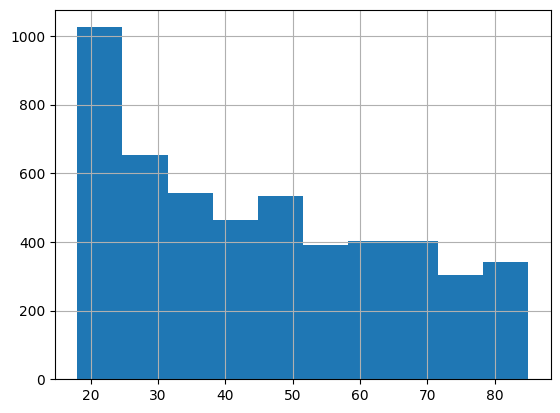

In [26]:
# Entendendo a distribuição de renda das pessoas

df['Idade'].hist()